In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize , LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Embedding
from tensorflow.keras.models import Model, Sequential

from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

from functions import *

In [2]:
kf = KFold(n_splits=5, shuffle=True, random_state=111)

In [3]:
# data read and types check
df = pd.read_csv('https://raw.githubusercontent.com/paq88/Fish_neural_network_classifier/refs/heads/main/Gut_analysis/Data/Gut_bacteria_merged.csv')
print(df.shape)
print(df.dtypes)
df.head()

(124, 127)
pond                                                                                           object
d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae             float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae       float64
d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae                    float64
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae                    float64
                                                                                               ...   
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae           float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae      float64
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae           float64
d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales

pond  \
0  Gut_S10   
1  Gut_S10   
2  Gut_S10   
3  Gut_S10   
4  Gut_S10   

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                             2319.0                                   
1                                             3391.0                                   
2                                             1338.0                                   
3                                             1582.0                                   
4                                             1463.0                                   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                             2187.0                                         
1                                             2071.0                                         
2                                             7053.0                                         
3                                            15595.0                                         
4                                             3891.0                                         

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                             1743.0                            
1                                              355.0                            
2                                              669.0                            
3                                              124.0                            
4                                              541.0                            

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                              500.0                            
1                                             1054.0                            
2                                              279.0                            
3                                              503.0                            
4                                                7.0                            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
0                                              521.0                                          
1                                             1024.0                                          
2                                              329.0                                          
3                                              309.0                                          
4                                               13.0                                          

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__  \
0                                              286.0            
1                                             1952.0            
2                                               63.0            
3                                                5.0            
4                                               11.0            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae  \
0                                              366.0                                                
1                                               66.0                                                
2                                               52.0                                                
3                                             3418.0                                                
4                                               61.0                                                

   d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae  \
0                                              612.0                                       
1                                              217.0                                       
2       

in this approach we will fill missing values as 0, after normalisation we will change those values to some small number - 0.00001

In [4]:
df = df.fillna(0)
df.head()

pond  \
0  Gut_S10   
1  Gut_S10   
2  Gut_S10   
3  Gut_S10   
4  Gut_S10   

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                             2319.0                                   
1                                             3391.0                                   
2                                             1338.0                                   
3                                             1582.0                                   
4                                             1463.0                                   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                             2187.0                                         
1                                             2071.0                                         
2                                             7053.0                                         
3                                            15595.0                                         
4                                             3891.0                                         

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                             1743.0                            
1                                              355.0                            
2                                              669.0                            
3                                              124.0                            
4                                              541.0                            

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                              500.0                            
1                                             1054.0                            
2                                              279.0                            
3                                              503.0                            
4                                                7.0                            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
0                                              521.0                                          
1                                             1024.0                                          
2                                              329.0                                          
3                                              309.0                                          
4                                               13.0                                          

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__  \
0                                              286.0            
1                                             1952.0            
2                                               63.0            
3                                                5.0            
4                                               11.0            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae  \
0                                              366.0                                                
1                                               66.0                                                
2                                               52.0                                                
3                                             3418.0                                                
4                                               61.0                                                

   d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae  \
0                                              612.0                                       
1                                              217.0                                       
2       

In [5]:
print(df.shape)
df.describe()
df

(124, 127)


pond  \
0    Gut_S10   
1    Gut_S10   
2    Gut_S10   
3    Gut_S10   
4    Gut_S10   
..       ...   
119   Gut_S9   
120   Gut_S9   
121   Gut_S9   
122   Gut_S9   
123   Gut_S9   

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                               2319.0                                   
1                                               3391.0                                   
2                                               1338.0                                   
3                                               1582.0                                   
4                                               1463.0                                   
..                                                 ...                                   
119                                              104.0                                   
120                                              750.0                                   
121                                              183.0                                   
122                                              490.0                                   
123                                               42.0                                   

     d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                               2187.0                                         
1                                               2071.0                                         
2                                               7053.0                                         
3                                              15595.0                                         
4                                               3891.0                                         
..                                                 ...                                         
119                                             9862.0                                         
120                                             3483.0                                         
121                                             1141.0                                         
122                                              167.0                                         
123                                             3597.0                                         

     d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                               1743.0                            
1                                                355.0                            
2                                                669.0                            
3                                                124.0                            
4                                                541.0                            
..                                                 ...                            
119                                              107.0                            
120                                              422.0                            
121                                              134.0                            
122                                                8.0                            
123                                               30.0                            

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                                500.0                            
1                                               1054.0                            
2                                                279.0                            
3                                                503.0                            
4                                                  7.0                            
..                                                 ...                            
119

In [6]:
predictors = df.columns[1:]
print(len(predictors))

126


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## Normalisation 
For AE sigmoid 

In [7]:
df_normalised = df.copy()
scaler = MinMaxScaler()
df_normalised[predictors] = scaler.fit_transform(df[predictors])
df_normalised.describe()

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
count                                         124.000000                                   
mean                                            0.126065                                   
std                                             0.169790                                   
min                                             0.000000                                   
25%                                             0.016182                                   
50%                                             0.071169                                   
75%                                             0.157306                                   
max                                             1.000000                                   

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
count                                         124.000000                                         
mean                                            0.328018                                         
std                                             0.215601                                         
min                                             0.000000                                         
25%                                             0.144135                                         
50%                                             0.280364                                         
75%                                             0.485015                                         
max                                             1.000000                                         

       d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
count                                         124.000000                            
mean                                            0.098320                            
std                                             0.128792                            
min                                             0.000000                            
25%                                             0.021658                            
50%                                             0.060528                            
75%                                             0.138267                            
max                                             1.000000                            

       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
count                                         124.000000                            
mean                                            0.067493                            
std                                             0.139237                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.001898                            
75%                                             0.086812                            
max                                             1.000000                            

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
count                                         124.000000                                          
mean                                            0.103075                                          
std                                             0.187979                                          
min                                             0.000000                                          
25%                                             0.000000                                          
50%                                             0.013184                                          
75%                                             0.127930              

## CLR transformation

In [8]:
df[predictors] = pd.DataFrame(clr_manual(df[predictors]),columns = df[predictors].columns)

In [9]:
predictors


Index(['d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae',
       'd__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae',
       'd__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae',
       ...
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alterom

In [10]:
df.describe()

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
count                                         124.000000                                   
mean                                            5.184129                                   
std                                             1.444798                                   
min                                            -0.325684                                   
25%                                             4.245242                                   
50%                                             5.502807                                   
75%                                             6.197913                                   
max                                             7.913779                                   

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
count                                         124.000000                                         
mean                                            8.149255                                         
std                                             1.072265                                         
min                                             4.708501                                         
25%                                             7.605297                                         
50%                                             8.190011                                         
75%                                             9.010625                                         
max                                             9.793854                                         

       d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
count                                         124.000000                            
mean                                            3.644067                            
std                                             1.554761                            
min                                            -0.436293                            
25%                                             3.165891                            
50%                                             3.971892                            
75%                                             4.739503                            
max                                             6.362286                            

       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
count                                         124.000000                            
mean                                            1.438091                            
std                                             2.158231                            
min                                            -1.245936                            
25%                                            -0.408017                            
50%                                             0.400069                            
75%                                             3.659931                            
max                                             5.991671                            

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
count                                         124.000000                                          
mean                                            1.940012                                          
std                                             2.209887                                          
min                                            -0.858576                                          
25%                                            -0.366712                                          
50%                                             2.041522                                          
75%                                             4.141260              

## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [11]:
codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
codes3 = {0 : [8,14,18,24,29], 1: [12,16,19,23,26,9,13,17,20,27], 2 : [10,21,28,30,32,11,15,22,25,31]}
codes2 = {0 : [8,14,18,24,29,12,16,19,23,26,9,13,17,20,27], 1 : [10,21,28,30,32,11,15,22,25,31]}

df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))

df_normalised['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df_normalised['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df_normalised['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))


C:\Users\marek\AppData\Local\Temp\ipykernel_28752\1000640414.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
C:\Users\marek\AppData\Local\Temp\ipykernel_28752\1000640414.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
C:\Users\marek\AppData\Local\Temp\ipykernel_28752\1000640414.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [12]:
df = df.copy()
df_normalised = df_normalised.copy()

## Splitting data into train and test sets

In [27]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=111, stratify=df['pond_5'], shuffle=True)
df_train_val.shape, df_test.shape

((99, 130), (25, 130))

# Creating autoencoder 

In [41]:
#reset_weights(autoencoder)

X_train_val = df_train_val[predictors]
X_test = df_test[predictors]
input_data = Input(shape = (X_train_val.shape[1],))
encoding_dim = 19

encoded = Dense(64, activation='linear')(input_data)
encoded = Dense(32, activation='linear')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(32, activation='linear')(encoded)
decoded = Dense(64, activation='linear')(decoded)
decoded = Dense(X_train_val.shape[1], activation='linear')(decoded)

autoencoder = Model(input_data, decoded)

encoder = Model(input_data, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

history_ae = autoencoder.fit(X_train_val, X_train_val, epochs=2000, batch_size=32, shuffle=True, validation_split=0.2)#, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

embeddings_train = encoder.predict(X_train_val)
embeddings_test = encoder.predict(X_test)



Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 4.1923 - val_loss: 3.0744
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1371 - val_loss: 2.7143
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6761 - val_loss: 2.4328
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.3979 - val_loss: 2.2117
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1972 - val_loss: 1.9338
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9138 - val_loss: 1.6641
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5629 - val_loss: 1.4542
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4045 - val_loss: 1.2806
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2330 - val_loss: 1.1447
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0919 - val_loss: 1.0619
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0333 - val_loss: 1.0181
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9

## Evaluating autoencoder

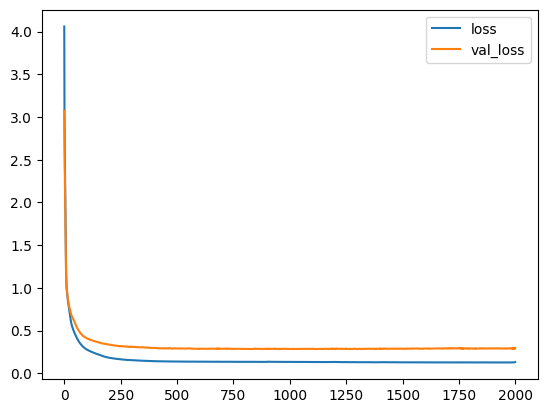

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<Axes: ylabel='Count'>

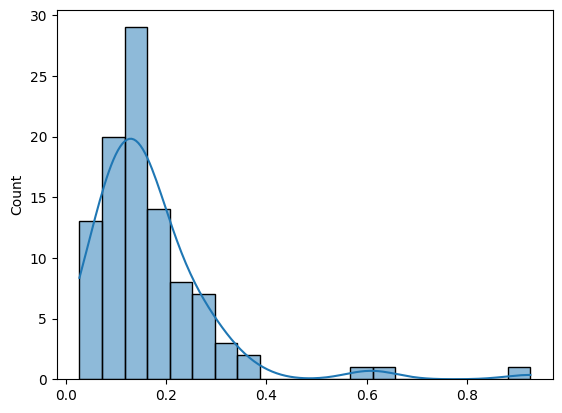

In [47]:
plt.plot(history_ae.history['loss'], label='loss')
plt.plot(history_ae.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


# reconstruction error 
reconstructed = autoencoder.predict(X_train_val)
reconstruction_error = np.mean(np.square(X_train_val - reconstructed), axis=1)
sns.histplot(reconstruction_error, kde=True)

In [48]:
pd.DataFrame(reconstructed)

0         1         2         3         4         5         6    \
0   5.371079  9.082268  4.680182  3.637061  3.169607 -0.409944 -0.277020   
1   3.155348  9.255809  1.513832 -0.112839  0.080629  1.039075  4.226440   
2   5.639869  7.035712  5.732224  0.121001  3.045254  2.676548  3.973210   
3   4.514688  9.088552  4.699909  0.041442  0.092616  1.825817 -0.727074   
4   7.119158  8.183599  3.750037  5.029045  3.755472  2.872533  3.198361   
..       ...       ...       ...       ...       ...       ...       ...   
94  6.751220  6.387510  5.134009  0.357136  3.475885  7.231193  7.102890   
95  5.786916  7.472908  5.899314  2.001694  3.796082  3.928543 -0.540996   
96  5.799876  8.597459  5.100291 -0.851399 -0.171269 -0.570306  2.624978   
97  4.866495  9.144851  0.353729 -0.674990 -0.520756 -0.338302  0.101534   
98  4.191334  8.237008  4.200988  2.147960  1.964113  2.554296  8.975955   

         7         8         9    ...       116       117       118       119  \
0   4.945160  1.309140  0.636448  ... -0.575598 -0.596456 -0.584107 -0.456553   
1   1.163827 -0.176449 -0.362603  ... -0.319467 -0.300705 -0.316558 -0.527893   
2   7.371896 -0.345666  0.974492  ... -0.477426 -0.717865 -0.483409 -0.906792   
3   5.239932  0.143301 -0.295624  ... -0.424192 -0.363437 -0.429434 -0.708873   
4   3.249275  2.586916  1.480492  ... -0.863585 -0.898474 -0.855218 -1.168696   
..       ...       ...       ...  ...       ...       ...       ...       ...   
94  5.494598  2.736615  1.629023  ... -1.127193 -1.353360 -1.090465 -0.511741   
95  7.189620  2.584188  1.569037  ... -0.824256 -0.544840 -0.816555 -0.911028   
96  4.629704  0.741769 -0.593417  ... -0.521525 -0.431756 -0.509305 -0.478128   
97  2.108929  0.720914 -0.388823  ... -0.486350 -0.347784 -0.484829 -0.943516   
98  3.607084  0.379006  0.534461  ... -0.721574 -0.589013 -0.706406 -0.155633   

         120       121       122       123       124       125  
0  -0.606958 -0.640423 -0.616078 -0.610381 -0.552090 -0.611833  
1  -0.320968 -0.319337 -0.300441 -0.296086 -0.403677 -0.296670  
2  -0.585383 -1.057299 -0.756567 -0.742544 -0.586653 -0.750910  
3  -0.463192 -0.421031 -0.494261 -0.488047 -0.346582 -0.494567  
4  -0.842610 -0.893865 -0.774903 -0.768859 -0.938719 -0.769931  
..       ...       ...       ...       ...       ...       ...  
94 -1.045374 -1.025883 -0.904747 -0.892209 -1.117435 -0.904625  
95 -0.814839 -0.376687 -0.789987 -0.779154 -0.393099 -0.789229  
96 -0.487796 -0.409736 -0.433335 -0.424431 -0.094939 -0.430365  
97 -0.485532 -0.125776 -0.457483 -0.448484 -0.179775 -0.451584  
98 -0.670984 -0.358049 -0.584944 -0.580288 -0.335817 -0.579571  

[99 rows x 126 columns]

In [49]:
X_train_val

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
12                                            4.900678                                   
43                                            2.544049                                   
21                                            4.838797                                   
72                                            4.102492                                   
13                                            6.000577                                   
..                                                 ...                                   
109                                           6.503508                                   
112                                           5.621300                                   
81                                            4.601858                                   
116                                           5.009455                                   
123                                           3.229910                                   

     d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
12                                            8.778924                                         
43                                            8.984995                                         
21                                            7.851771                                         
72                                            9.439924                                         
13                                            7.798981                                         
..                                                 ...                                         
109                                           4.986240                                         
112                                           7.804818                                         
81                                            8.374549                                         
116                                           9.015051                                         
123                                           7.656844                                         

     d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
12                                            3.956863                            
43                                            2.013421                            
21                                            5.857916                            
72                                            4.197803                            
13                                            3.773830                            
..                                                 ...                            
109                                           4.725447                            
112                                           4.565022                            
81                                            5.057184                            
116                                           0.308975                            
123                                           2.902697                            

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
12                                            4.322797                            
43                                           -0.289164                            
21                                           -0.694592                            
72                                           -0.397317                            
13                                            4.930640                            
..                                                 ...                            
109                                          -0.775811                            
112                                           2.798840                            
81                         

# 5 classes


In [129]:
y_train_val = df_train_val['pond_5']
y_test = df_test['pond_5']

In [130]:
embeddings_df = pd.DataFrame(embeddings_train)
column_names = embeddings_df.columns.tolist()
print(column_names)
y_train_val.reset_index(drop=True, inplace=True)
embeddings_df['pond'] = y_train_val
embeddings_df


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


0         1         2         3         4         5         6  \
0   4.228606 -0.525292 -0.974869 -1.268019 -0.869873  2.492998 -0.649373   
1   1.986852 -2.594855 -1.101686  1.965360 -2.276841 -2.074474  1.234592   
2   3.725351 -0.734526  3.509532 -0.283655 -3.021641 -1.510608  0.822949   
3   2.248909 -1.128985  0.738375 -0.819885 -3.527553  0.832542 -0.843352   
4   3.727071  0.524976 -1.348004 -0.220204  1.872532 -0.673653  2.126229   
..       ...       ...       ...       ...       ...       ...       ...   
94  2.045770  3.397664  2.978898  2.630433  2.639646 -2.203036  3.751630   
95  1.658543  1.167600  3.210597  0.668340 -1.664715  2.530102  1.855570   
96  0.747548 -2.628372  1.418488  0.487884 -5.112632 -1.427939  0.402045   
97  1.218291 -3.596817  0.623987  0.297538 -3.284239  0.734688  4.167366   
98  3.318220 -1.227475 -1.269915  3.348155 -1.880090 -3.072810  0.728283   

           7         8         9        10        11        12        13  \
0   1.844322  1.531484  3.696997 -0.409453 -0.517673  1.873103  1.251699   
1   0.704267  0.362928  2.361115 -1.549300 -1.251192  0.382169  0.741140   
2   3.003908  0.479449  3.328874 -0.214075 -1.187943  2.834487 -0.734293   
3   0.892934  0.239083  5.935088 -0.440148 -1.947434  1.022919  1.200513   
4   3.609166 -1.114454  2.658639 -0.882750  0.401801  1.540376  0.490876   
..       ...       ...       ...       ...       ...       ...       ...   
94  4.214748 -0.532104  1.959453 -1.795840 -0.547320  1.102043  1.212165   
95  2.096287  1.049114  6.147596 -2.874544 -0.869679  3.041147  1.177918   
96  2.137723  1.855206  3.280726  2.211151 -0.429953  1.254565  2.310798   
97  0.044141 -1.452147  1.527553 -0.365782  1.645764 -0.382609  0.590746   
98  1.752212  0.642195  4.157304 -1.477782 -2.465720 -1.393014  2.993164   

          14        15        16        17        18  pond  
0  -0.505903  0.288053  1.748179 -0.177302 -0.314105     1  
1   1.589433  3.192406  1.539936 -0.762935 -1.647215     0  
2  -1.031096 -0.519177  0.646436 -4.163112 -3.370600     0  
3  -0.015232 -3.282706  2.819914 -2.034698 -0.152741     0  
4  -2.679750  1.988969  2.749356  0.484808 -1.560259     1  
..       ...       ...       ...       ...       ...   ...  
94 -2.497933 -1.722753  2.047104 -5.700437  0.600524     4  
95 -0.043417 -2.482641 -0.622393 -0.638783  1.261472     2  
96  2.623163  2.001420 -0.177180 -1.674767  0.324291     1  
97  3.783801  4.603706  0.748835  0.048193  0.031680     0  
98 -2.314208  0.230726 -0.346942 -2.867162  1.219683     3  

[99 rows x 20 columns]

In [ ]:
#embeddings_df.to_csv('embeddings_5.csv', index=False)
#embeddings_df = pd.read_csv('embeddings_5.csv')

## dense model 
fitting on embeded dataset


In [ ]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(128, input_shape=(encoding_dim,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(64, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(8, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.Dense(5, activation ='softmax'))

model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,381 (44.46 KB)

 Trainable params: 11,381 (44.46 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6000 - loss: 1.4935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
predicted classes:       [3 3 4 2 2 3 0 0 3 1 1 2 2 4 3 2 4 3 2 2]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 112.4467, sd confidence score: 187.826
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 3.4521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [3 4 2 4 4 1 2 2 3 3 1 3 4 4 4 3 3 1 2 4]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 1550.4038, sd confidence score: 4897.0454
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3000 - loss: 2.2030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [4 3 3 2 4 4 4 3 1 4 1 3 4 4 2 3 2 3 1 3]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 77.0471, sd confidence score: 

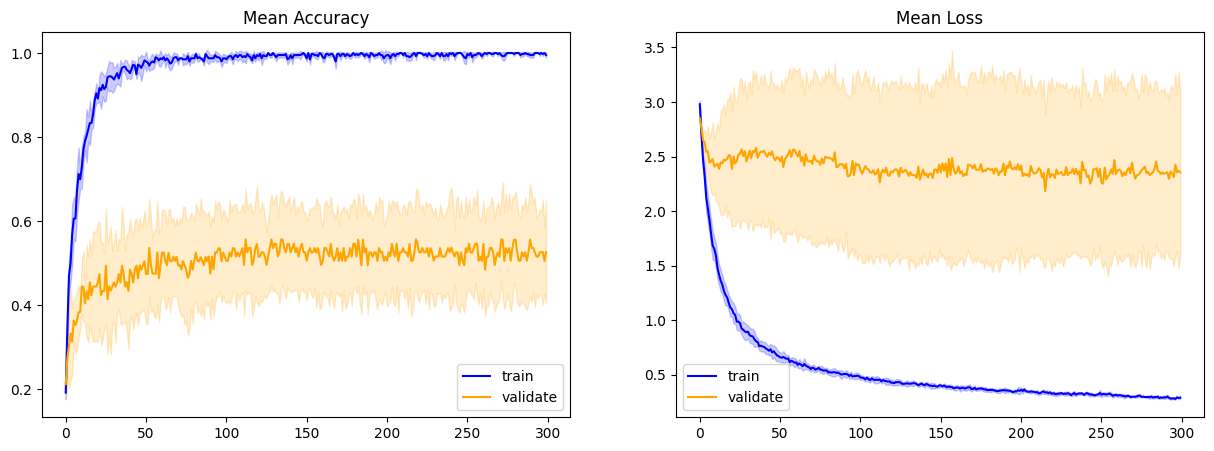

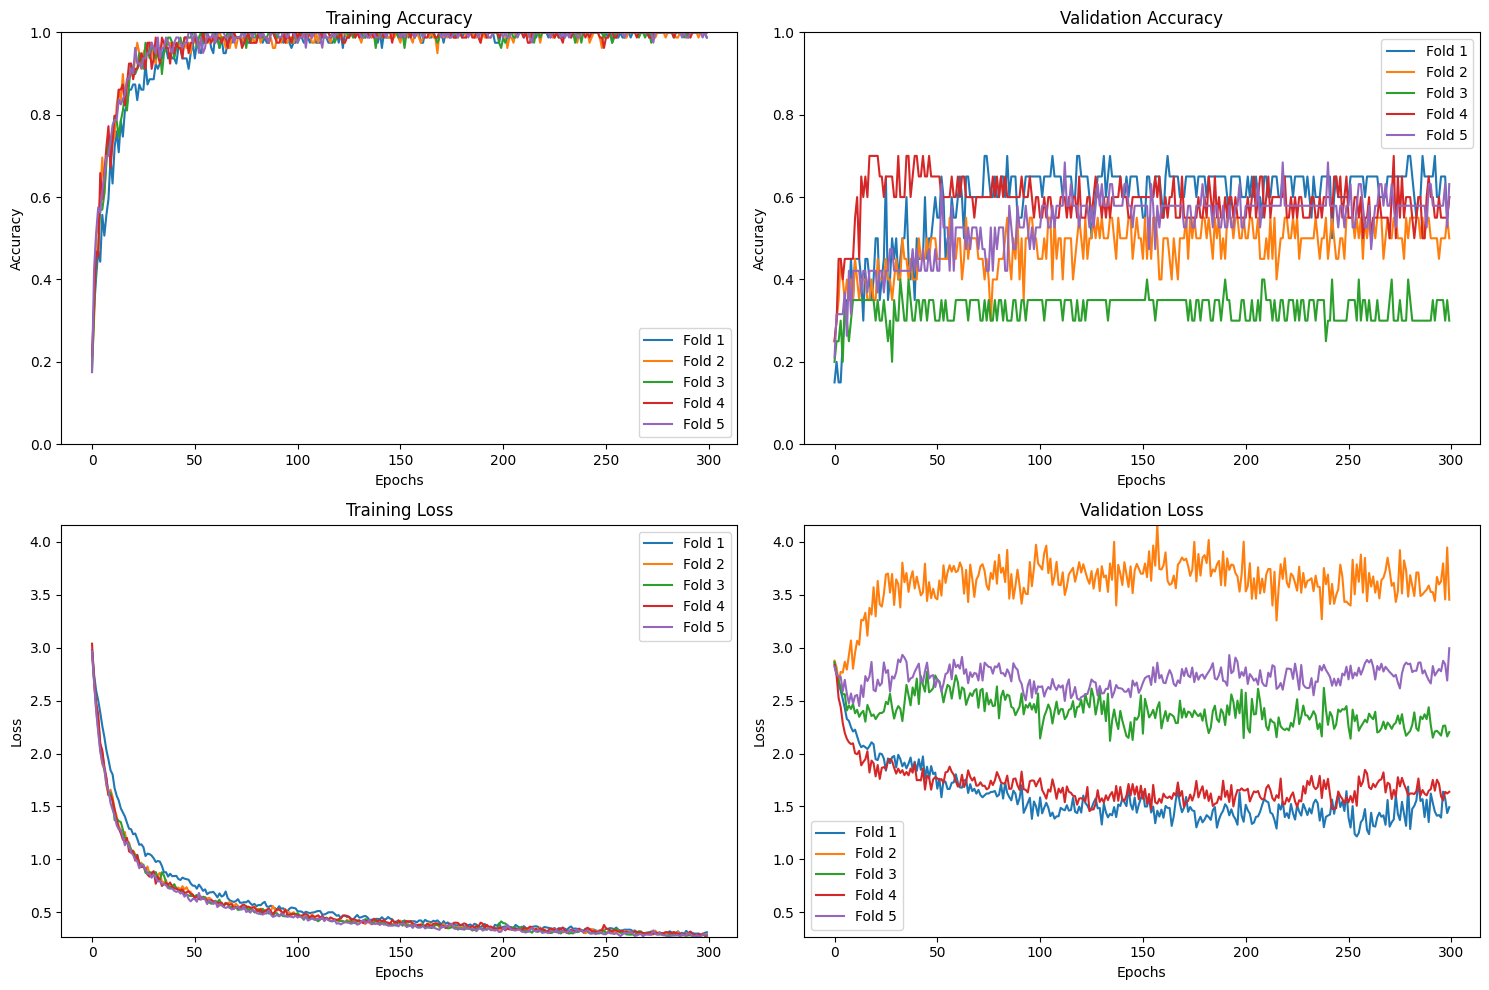

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted classes:       [0 0 4 1 0 4 3 1 2 0 0 4 4 1 3 0 1 0 3]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


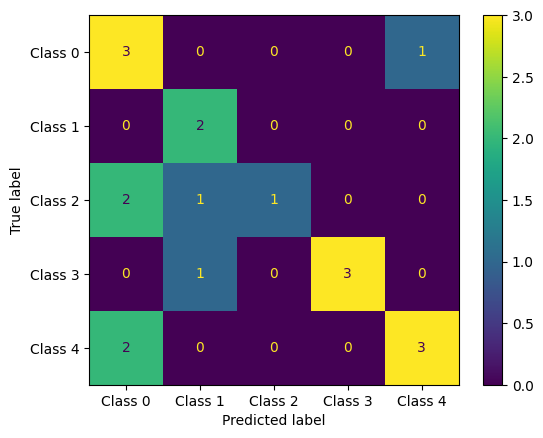

In [46]:
crossvalidate(embeddings_df, model1, column_names, 'pond', kf, 300)

### Test Dataset

In [150]:
X_train = embeddings_df[column_names]
y_train = embeddings_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pd.DataFrame(embeddings_test, columns=column_names)
y_test = df_test['pond_5']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0647 - loss: 3.0573 - val_accuracy: 0.2800 - val_loss: 2.7148
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 2.6425 - val_accuracy: 0.4000 - val_loss: 2.5392
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4005 - loss: 2.3871 - val_accuracy: 0.3600 - val_loss: 2.3502
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 2.0983 - val_accuracy: 0.3200 - val_loss: 2.2855
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5406 - loss: 2.0714 - val_accuracy: 0.4400 - val_loss: 2.1195
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - loss: 1.9349 - val_accuracy: 0.5200 - val_loss: 2.0602
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 1.7453 - val_accuracy: 0.4800 - val_loss: 1.9905
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 1.7383 - val_accuracy: 0.4400 - v

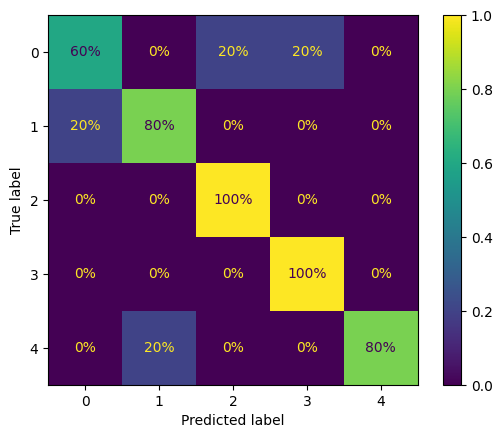

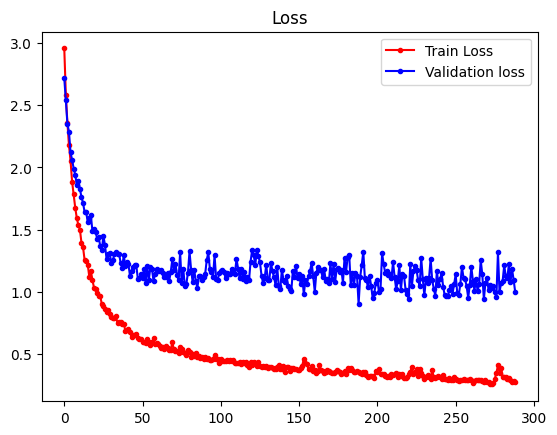

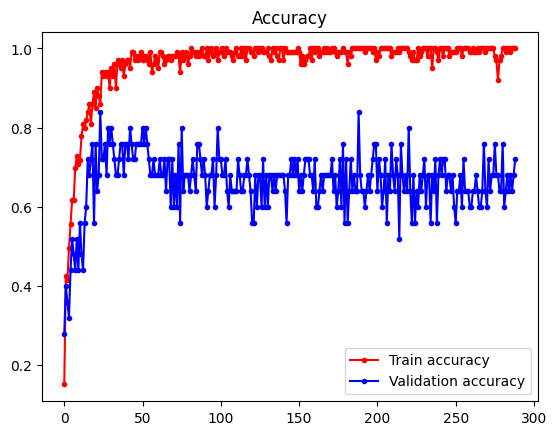

In [ ]:
history1=model1.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model1, history1, X_test, y_test)

## Embeding using embeding layer 
worse performance than AE

In [ ]:
model2 = keras.Sequential()
model2.add(Embedding(input_dim = 1000, output_dim = 19, input_length = len(predictors)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(Dropout(rate=0.25))
model2.add(Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.2500 - loss: 2.9367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
predicted classes:       [1 4 4 2 4 0 3 4 3 0 0 2 4 3 0 2 1 3 2 4]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 40.4736, sd confidence score: 56.3621
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4000 - loss: 2.3839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [4 2 0 4 0 1 2 2 3 3 4 3 2 4 0 4 0 1 2 2]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 227.6205, sd confidence score: 947.2181
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6500 - loss: 1.5897
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted classes:       [1 1 2 2 0 4 2 0 0 0 1 3 4 2 2 1 2 4 4 1]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 625.999, sd confidence score: 213

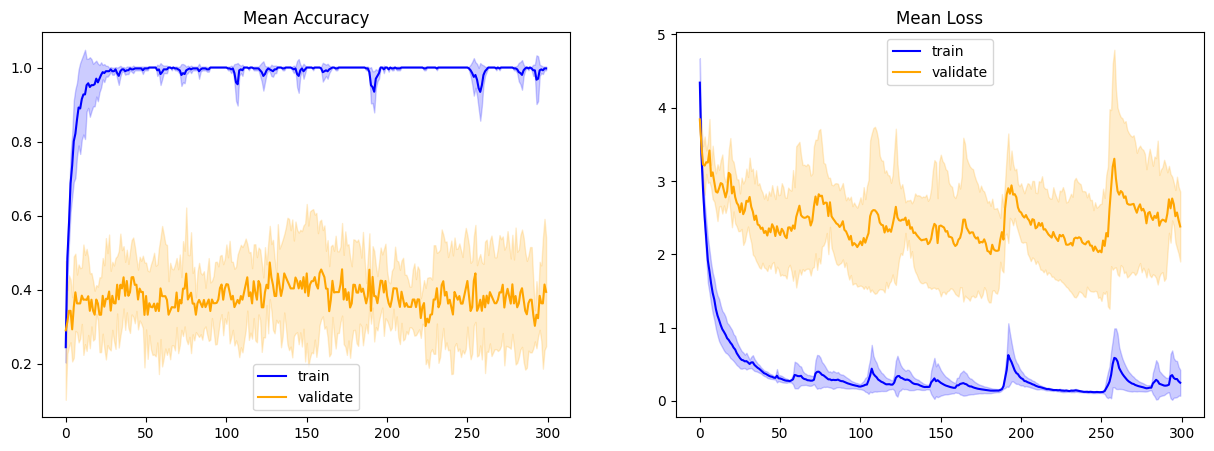

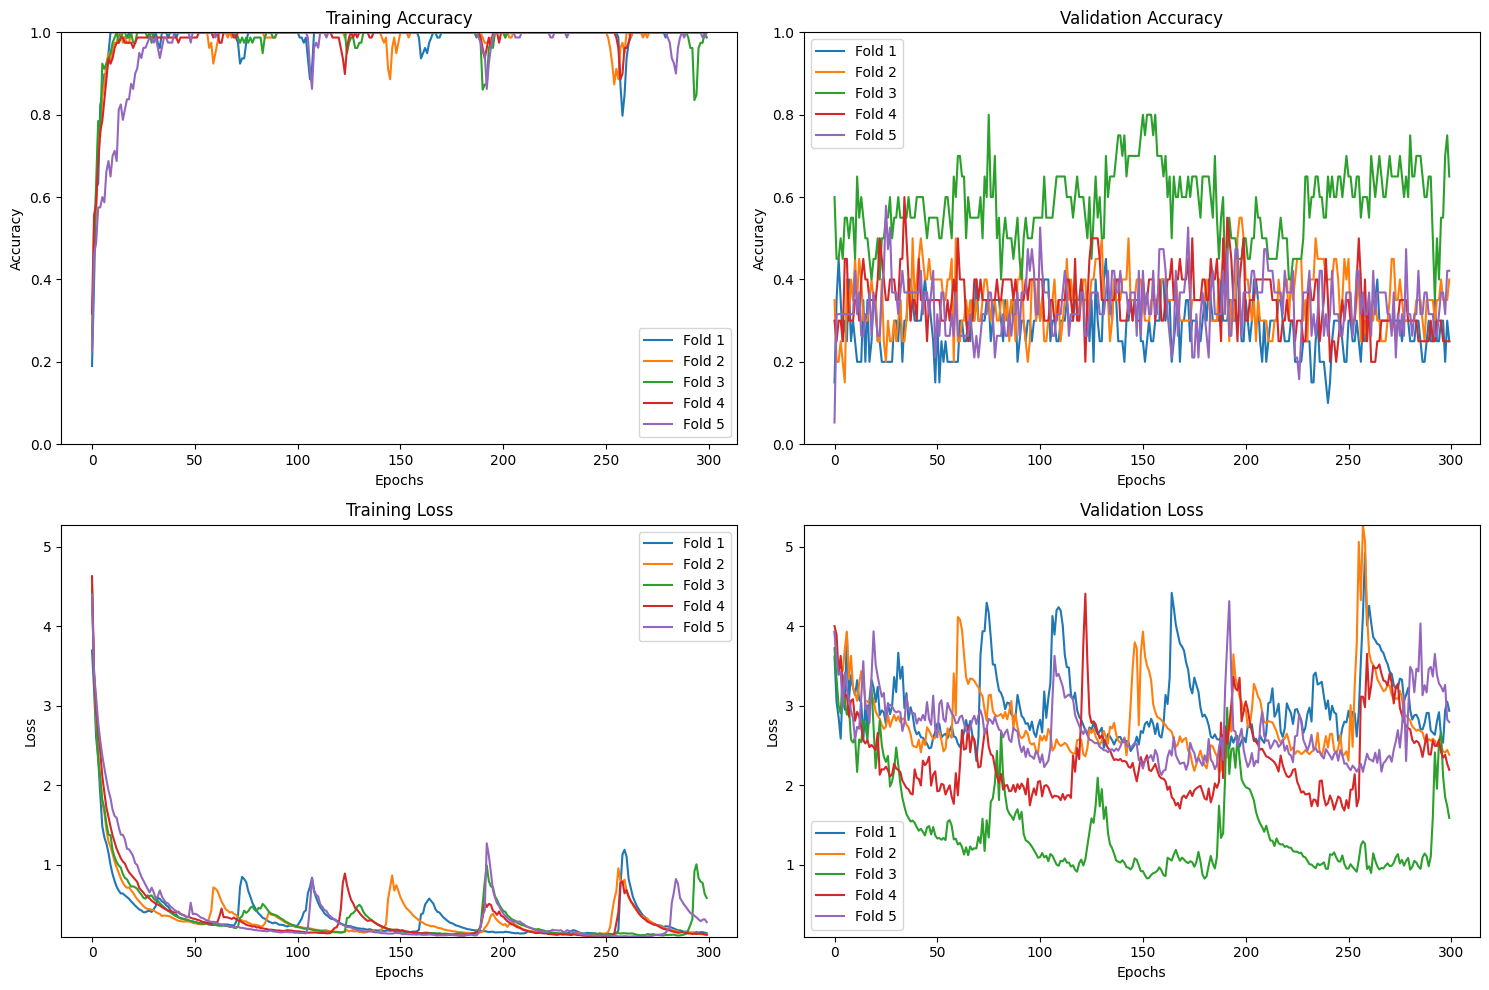

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [4 4 1 0 3 0 1 0 2 4 2 2 4 3 3 4 4 2 1]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


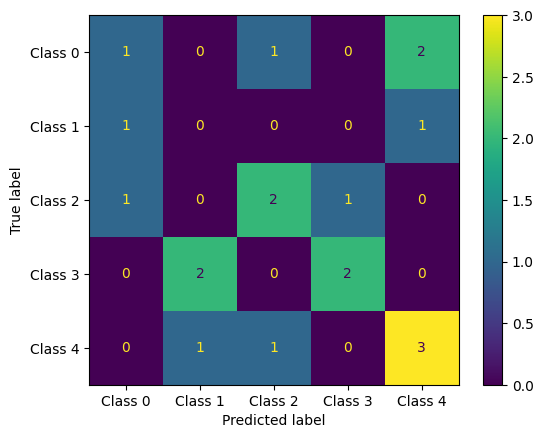

In [ ]:
crossvalidate(df_train_val, model2, predictors, 'pond_5', kf, 300)

## Convolutional model

In [169]:
model1c = keras.Sequential()
model1c.add(keras.layers.Conv1D(filters=2, kernel_size=3, activation='relu',input_shape = (encoding_dim,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model1c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model1c.add(keras.layers.MaxPooling1D(pool_size = 2))
model1c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model1c.add(Flatten())
model1c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model1c.add(keras.layers.Dropout(rate = 0.25))
model1c.add(keras.layers.Dense(16, activation = 'relu'))
model1c.add(keras.layers.Dense(5, activation ='softmax'))

model1c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 17, 2)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 8, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 8, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,229 (67.30 KB)

 Trainable params: 17,229 (67.30 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5500 - loss: 1.7419
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
predicted classes:       [3 3 2 2 2 0 3 0 3 1 3 0 2 4 4 2 3 3 2 2]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 17.9068, sd confidence score: 27.1607
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5500 - loss: 1.9810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [3 2 1 2 4 1 2 2 3 4 4 3 4 4 3 2 3 1 2 4]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 28.0309, sd confidence score: 93.5724
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3000 - loss: 1.8774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predicted classes:       [1 1 3 4 1 4 2 4 1 4 1 1 2 4 2 3 2 3 2 3]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 6.412, sd confidence score: 11.8731

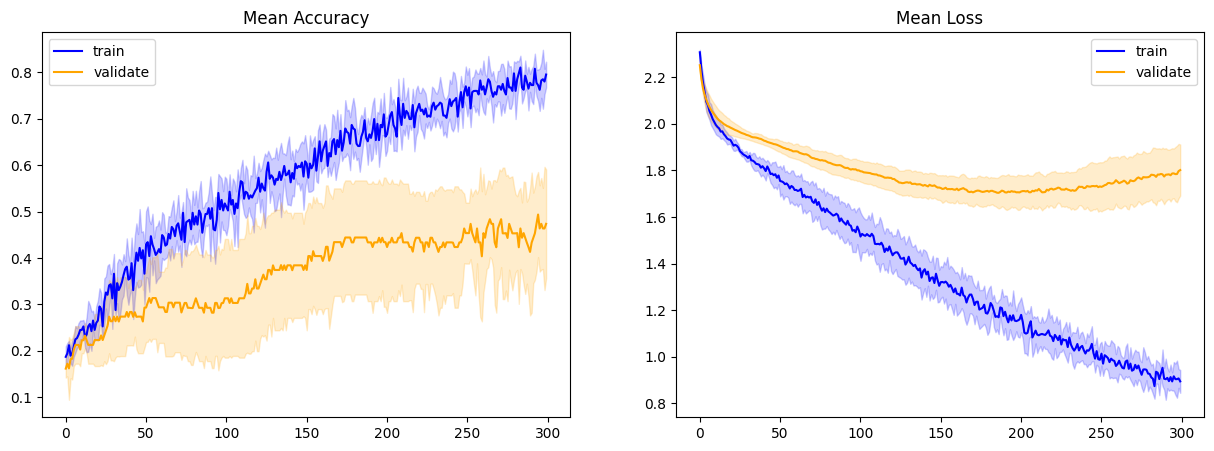

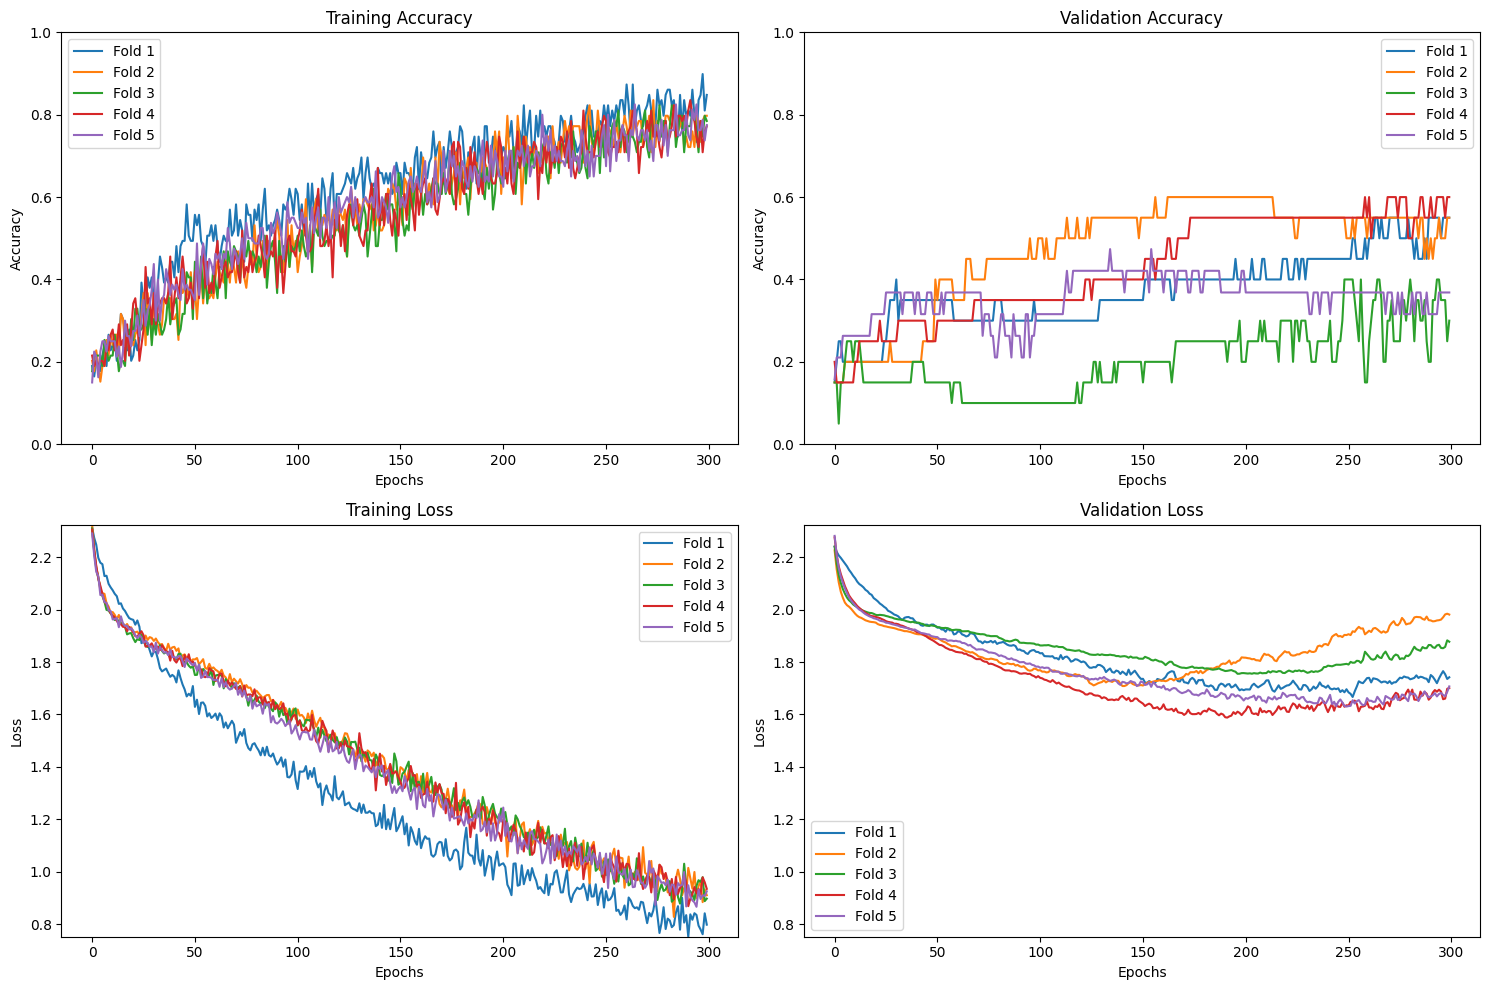

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted classes:       [0 2 0 2 0 1 0 1 2 4 0 4 3 1 3 0 0 0 3]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


In [170]:
reset_weights(model1c)
crossvalidate(embeddings_df, model1c, column_names, 'pond',kf,300,True)

### Test    

In [171]:
X_train_c = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_c = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5200 - loss: 1.4930
[1.493044376373291, 0.5199999809265137]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted values: [1 2 2 1 0 4 4 3 2 2 1 3 4 0 4 1 1 0 2 3 3 1 1 3 4]
True values: [3 0 2 1 3 1 0 1 2 2 4 3 4 0 4 1 3 0 2 4 0 1 4 3 2]


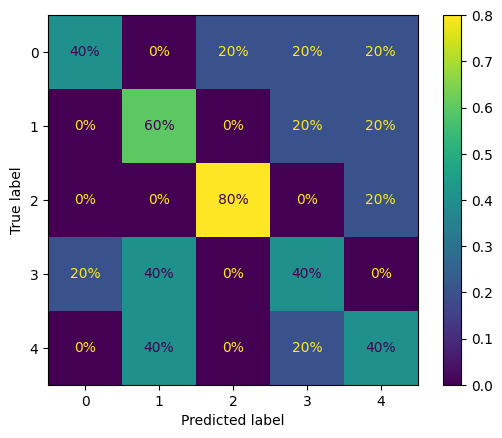

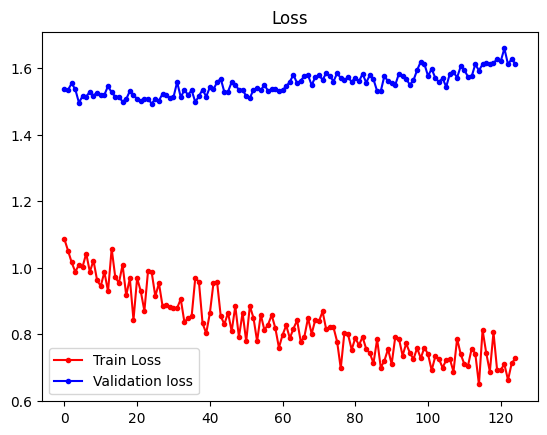

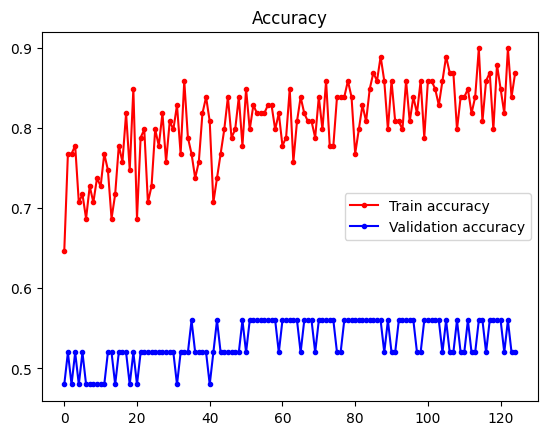

In [172]:
history1c=model1c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model1c, history1c, X_test_c, y_test)

# 3 Classes

In [176]:
y = df_train_val['pond_3']
y.reset_index(drop=True, inplace=True)
embeddings_df['pond'] = y

## Dense model

In [108]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(128, input_shape=(encoding_dim,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(64, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#mode31.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(8, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dense(3, activation ='softmax'))

model3.summary()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,363 (44.39 KB)

 Trainable params: 11,363 (44.39 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6000 - loss: 1.4033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted classes:       [1 1 2 1 2 1 0 2 1 1 1 0 2 2 1 2 2 1 2 2]
true validation classes: [1 1 1 2 2 0 1 1 1 1 1 2 2 2 0 2 2 1 1 2]
mean confidence score: 519.6939, sd confidence score: 1162.5752
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5500 - loss: 2.0406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 1 1 2 0]
true validation classes: [0 0 0 2 2 0 0 2 1 0 1 1 2 2 0 2 1 1 2 1]
mean confidence score: 1380.6232, sd confidence score: 3908.6204
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8000 - loss: 1.0775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [1 1 2 2 2 2 2 1 1 2 1 1 2 2 2 1 2 1 2 1]
true validation classes: [1 1 2 2 0 2 0 1 0 2 1 1 2 2 2 1 1 1 2 1]
mean confidence score: 635.3923, sd confidence scor

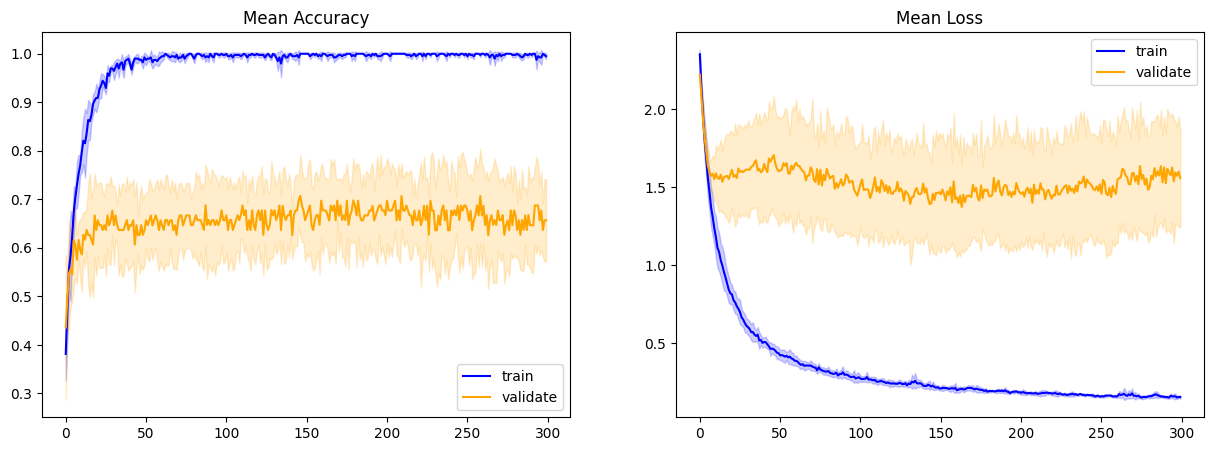

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 0 2 2 0 2 1 1 2 0 0 2 2 1 1 0 2 0 1]
true validation classes: [2 0 2 2 2 0 1 1 2 0 2 2 2 1 1 2 1 0 1]


In [109]:
crossvalidate(embeddings_df, model3, column_names, 'pond',kf,300)

### Test

In [187]:
X_train = embeddings_df[column_names]
y_train = embeddings_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pd.DataFrame(embeddings_test, columns=column_names)
y_test = df_test['pond_3']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4336 - loss: 2.2058 - val_accuracy: 0.3600 - val_loss: 2.0590
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 1.7392 - val_accuracy: 0.7200 - val_loss: 1.4805
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 1.5083 - val_accuracy: 0.6000 - val_loss: 1.5161
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7304 - loss: 1.3758 - val_accuracy: 0.7200 - val_loss: 1.3509
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7282 - loss: 1.2073 - val_accuracy: 0.6800 - val_loss: 1.3145
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 1.1844 - val_accuracy: 0.6800 - val_loss: 1.2758
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 1.0965 - val_accuracy: 0.6400 - val_loss: 1.2499
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.9984 - val_accuracy: 0.6800 - v

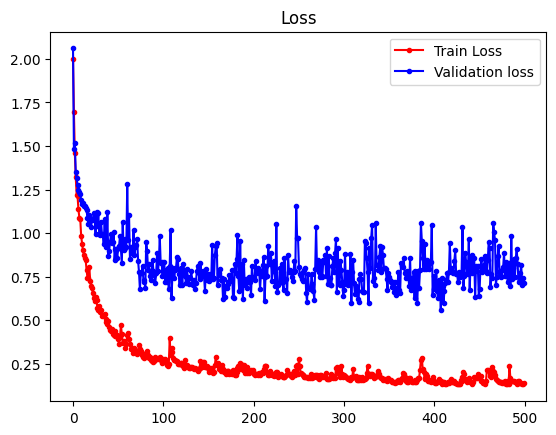

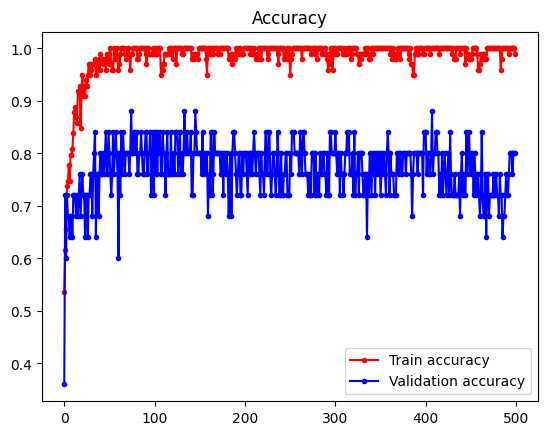

In [113]:
reset_weights(model3)
history3 = model3.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))
evaluate_model(model3, history3, X_test, y_test)

## Convolution model    

In [183]:
model2c = keras.Sequential()
model2c.add(keras.layers.Conv1D(filters=1, kernel_size=3, activation='relu',input_shape = (encoding_dim,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model2c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model2c.add(keras.layers.MaxPooling1D(pool_size = 2))
model2c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model2c.add(Flatten())
model2c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2c.add(keras.layers.Dropout(rate = 0.25))
model2c.add(keras.layers.Dense(16, activation = 'relu'))
model2c.add(keras.layers.Dense(3, activation ='softmax'))

model2c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)              │ (None, 17, 1)          │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 8, 64)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,127 (66.90 KB)

 Trainable params: 17,127 (66.90 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7000 - loss: 0.9091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
predicted classes:       [1 1 2 2 2 1 1 0 1 2 1 2 2 2 0 2 1 1 2 2]
true validation classes: [1 1 1 2 2 0 1 1 1 1 1 2 2 2 0 2 2 1 1 2]
mean confidence score: 7.7351, sd confidence score: 10.995
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 1.3311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted classes:       [1 2 2 1 2 0 1 2 1 1 2 1 1 0 2 2 1 1 2 1]
true validation classes: [0 0 0 2 2 0 0 2 1 0 1 1 2 2 0 2 1 1 2 1]
mean confidence score: 5.3409, sd confidence score: 6.2572
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5500 - loss: 1.2362
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [2 0 1 2 1 2 2 1 2 2 1 1 2 2 2 1 2 2 2 2]
true validation classes: [1 1 2 2 0 2 0 1 0 2 1 1 2 2 2 1 1 1 2 1]
mean confidence score: 7.4229, sd confidence score: 17.1694
tr

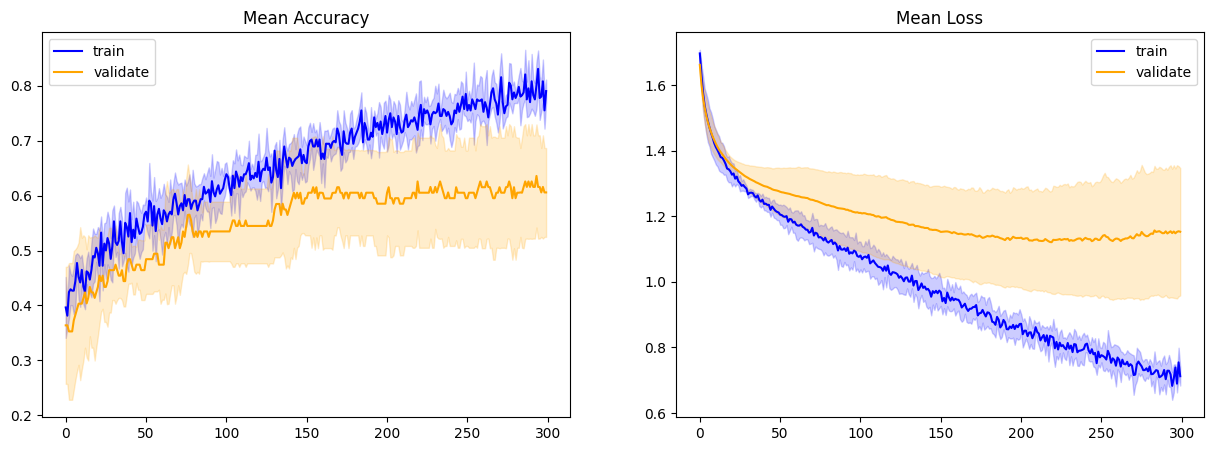

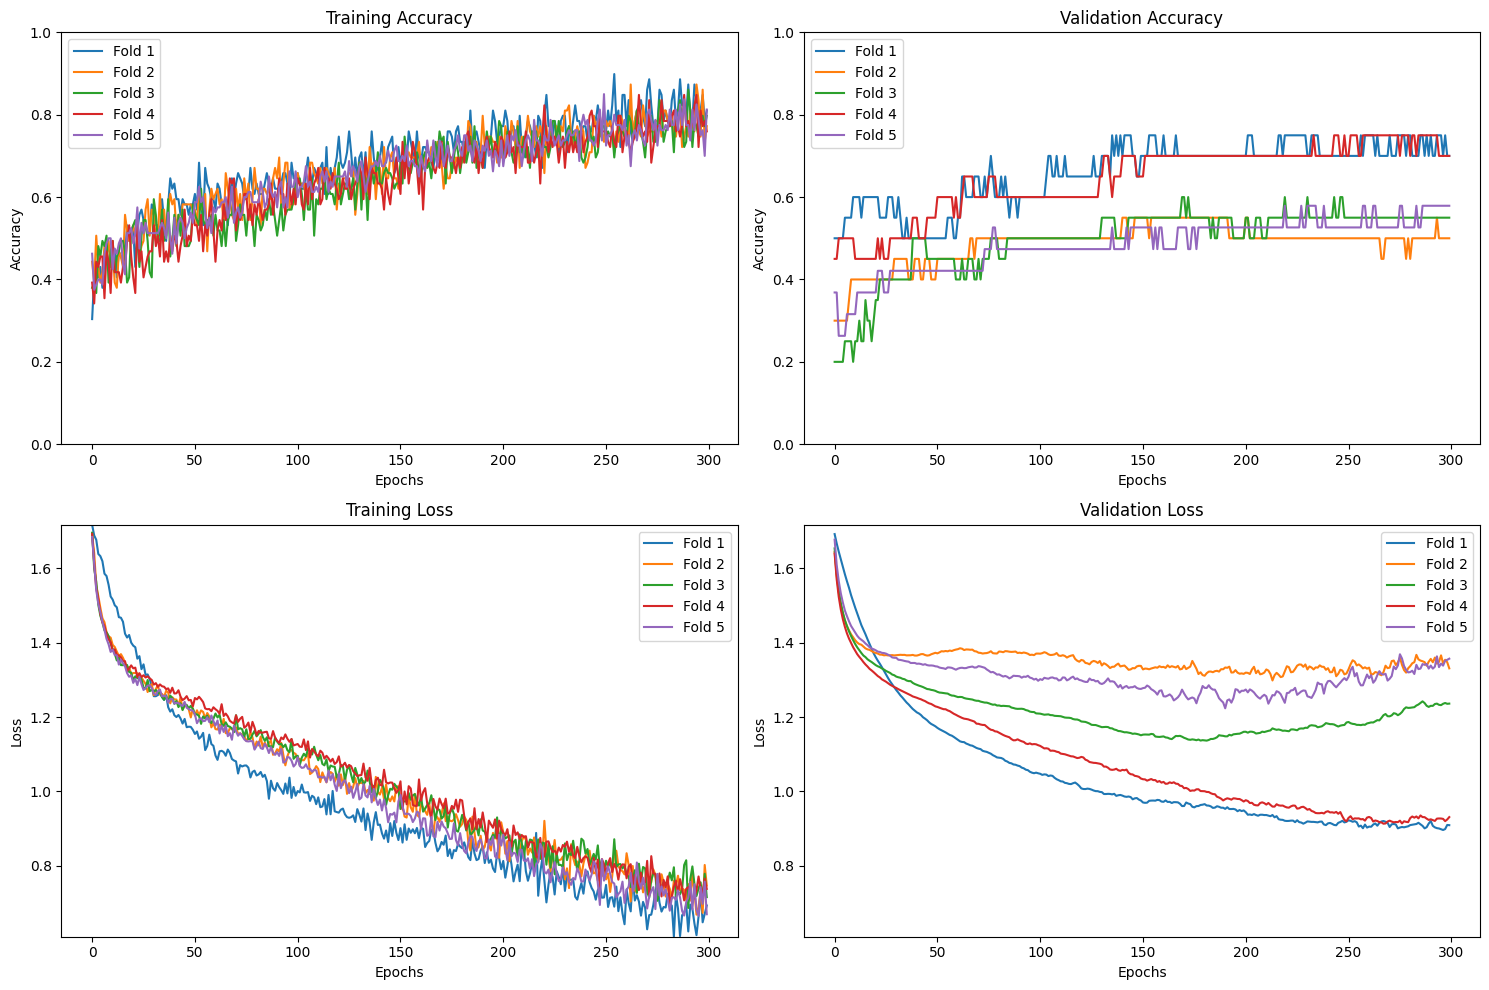

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predicted classes:       [1 0 1 1 0 2 1 1 2 1 2 2 2 1 1 0 1 2 1]
true validation classes: [2 0 2 2 2 0 1 1 2 0 2 2 2 1 1 2 1 0 1]


In [184]:
crossvalidate(embeddings_df, model2c, column_names, 'pond',kf,300,True)

### test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7600 - loss: 0.7220
[0.7220245599746704, 0.7599999904632568]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted values: [1 0 2 1 1 1 0 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 2]
True values: [1 0 2 1 1 1 0 1 2 2 2 1 2 0 2 1 1 0 2 2 0 1 2 1 2]


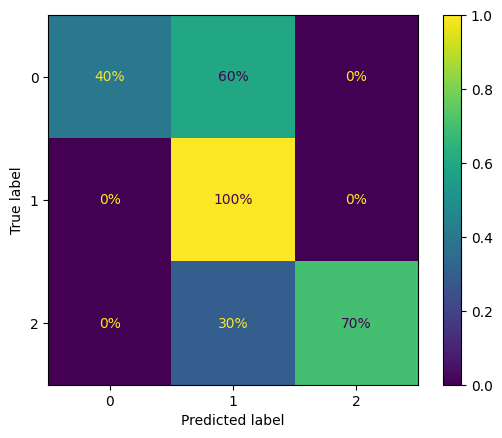

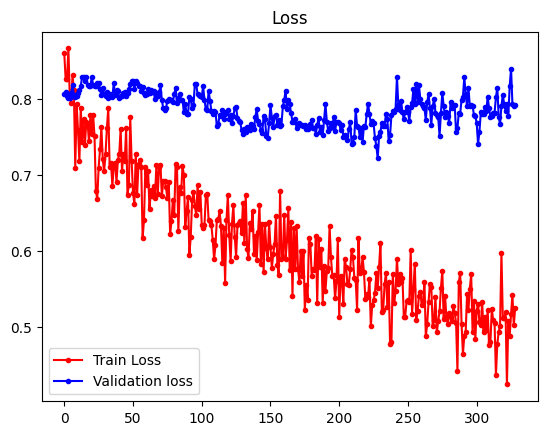

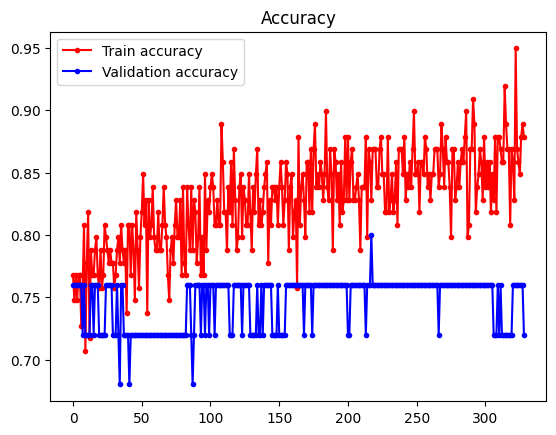

In [189]:
history2c=model2c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model2c, history2c, X_test_c, y_test)

# 2 Classes

## Dense model

In [190]:
y = df_train_val['pond_2']
y.reset_index(drop=True, inplace=True)
embeddings_df['pond'] = y

In [123]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(64, input_shape=(encoding_dim,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(32, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#mode4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(16, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(keras.layers.Dense(2, activation ='softmax'))

model4.summary()
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8500 - loss: 0.6563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1]
true validation classes: [0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
mean confidence score: 17340.3234, sd confidence score: 41205.4801
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7000 - loss: 1.2994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0]
true validation classes: [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
mean confidence score: 1198.2179, sd confidence score: 2667.2914
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8500 - loss: 0.6623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]
true validation classes: [0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
mean confidence score: 259.9849, sd confidence sc

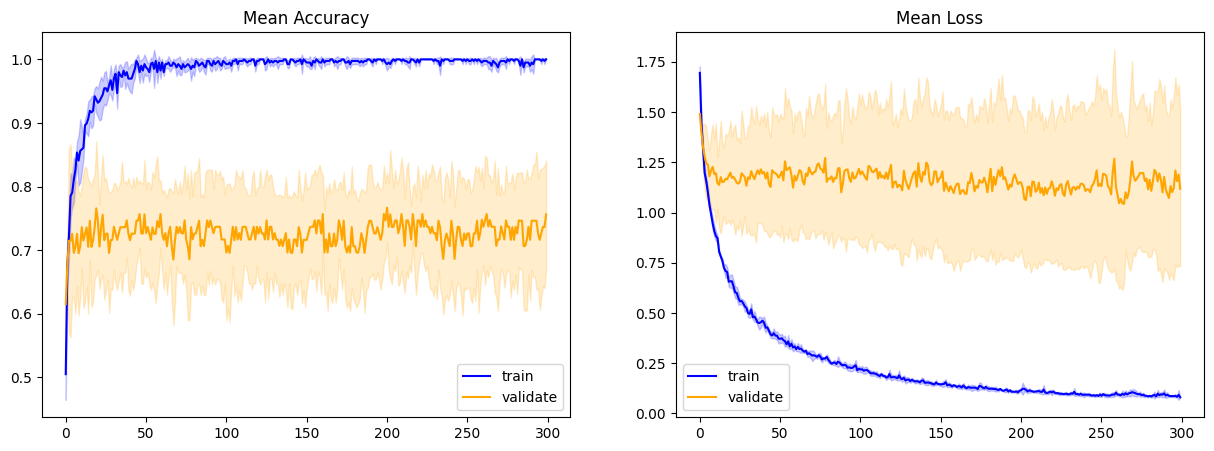

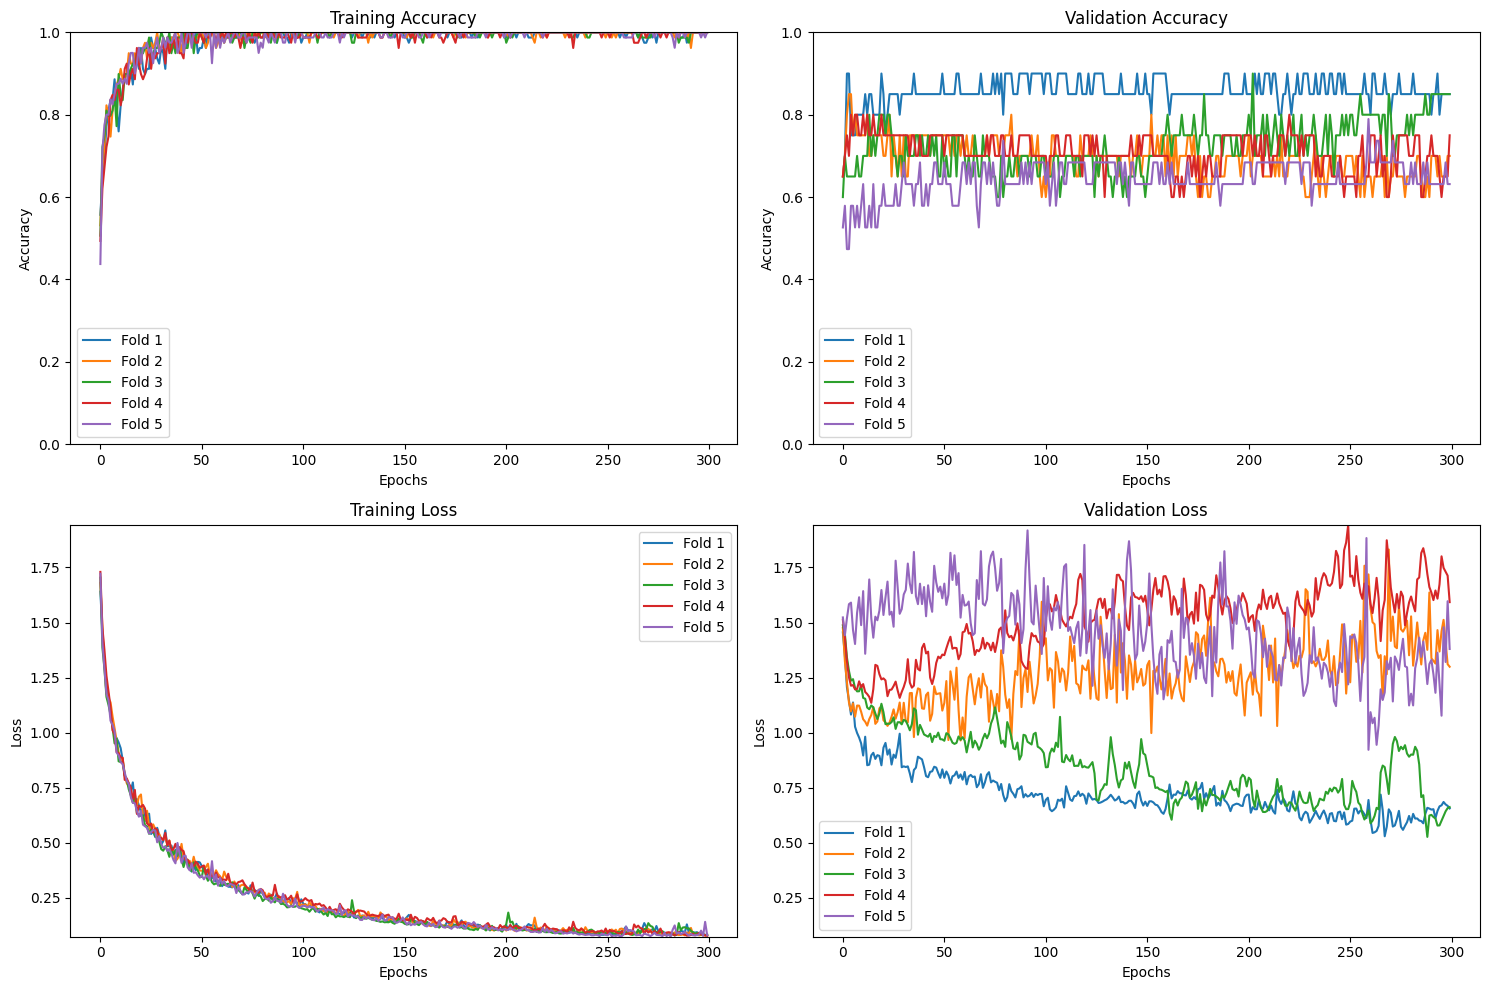

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted classes:       [0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0]
true validation classes: [1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0]


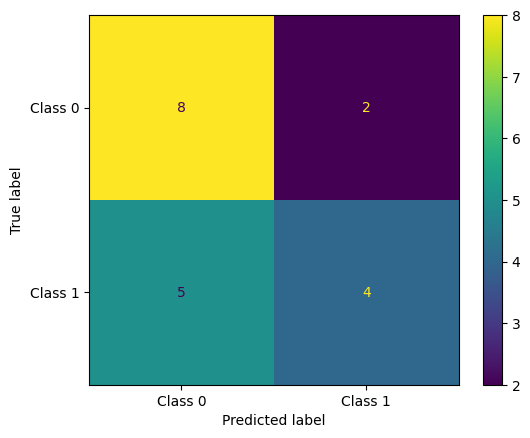

In [ ]:
#reset_weights(model4)
crossvalidate(embeddings_df, model4, column_names, 'pond',kf,300)

### Test

In [191]:
X_train = embeddings_df[column_names]
y_train = embeddings_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pd.DataFrame(embeddings_test, columns=column_names)
y_test = df_test['pond_2']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 0.3093 - val_accuracy: 0.8000 - val_loss: 0.5188
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.2000 - val_accuracy: 0.8000 - val_loss: 0.5559
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.2024 - val_accuracy: 0.8400 - val_loss: 0.5454
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1419 - val_accuracy: 0.8000 - val_loss: 0.6460
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9927 - loss: 0.1137 - val_accuracy: 0.8400 - val_loss: 0.6063
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.1149 - val_accuracy: 0.8400 - val_loss: 0.5385
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1007 - val_accuracy: 0.8400 - val_loss: 0.6715
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 0.1128 - val_accuracy: 0.8400 - v

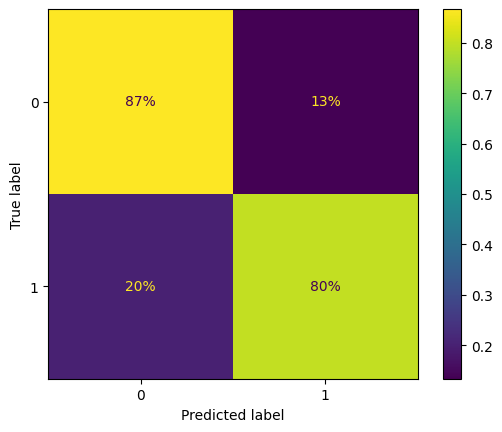

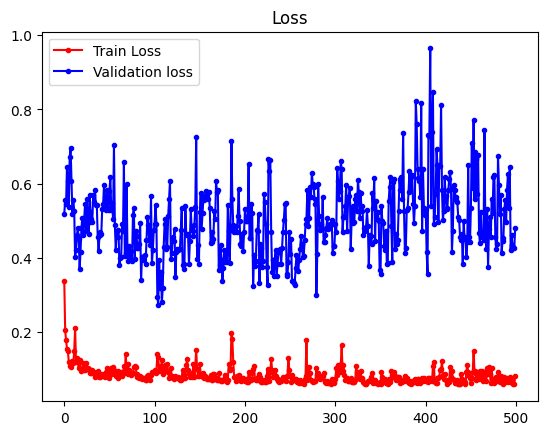

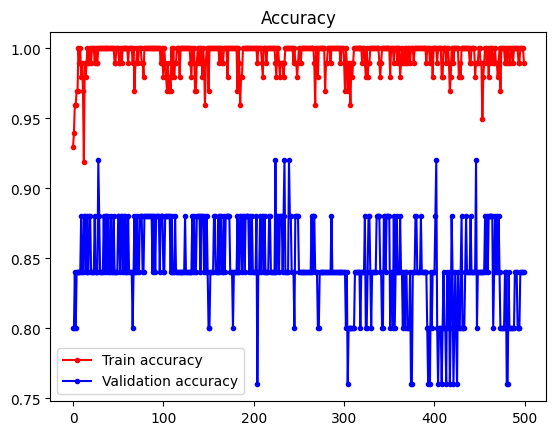

In [128]:
#  reset_weights(model4)
history3 = model4.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))
evaluate_model(model4, history3, X_test, y_test)

## Convolution model

In [205]:
model3c = keras.Sequential()
model3c.add(keras.layers.Conv1D(filters=1, kernel_size=3, activation='relu',input_shape = (encoding_dim,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model3c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3c.add(keras.layers.MaxPooling1D(pool_size = 2))
model3c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model3c.add(Flatten())
model3c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3c.add(keras.layers.Dropout(rate = 0.25))
model3c.add(keras.layers.Dense(16, activation = 'relu'))
model3c.add(keras.layers.Dense(8, activation = 'relu'))

model3c.add(keras.layers.Dense(2, activation ='softmax'))

model3c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)              │ (None, 17, 1)          │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 8, 64)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,230 (67.30 KB)

 Trainable params: 17,230 (67.30 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation


Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7000 - loss: 0.5966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted classes:       [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
true validation classes: [0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
mean confidence score: 3.2581, sd confidence score: 2.6272
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 1.0508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0]
true validation classes: [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
mean confidence score: 38.5788, sd confidence score: 96.8395
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.5548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0]
true validation classes: [0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
mean confidence score: 7899.8977, sd confidence score: 34395.

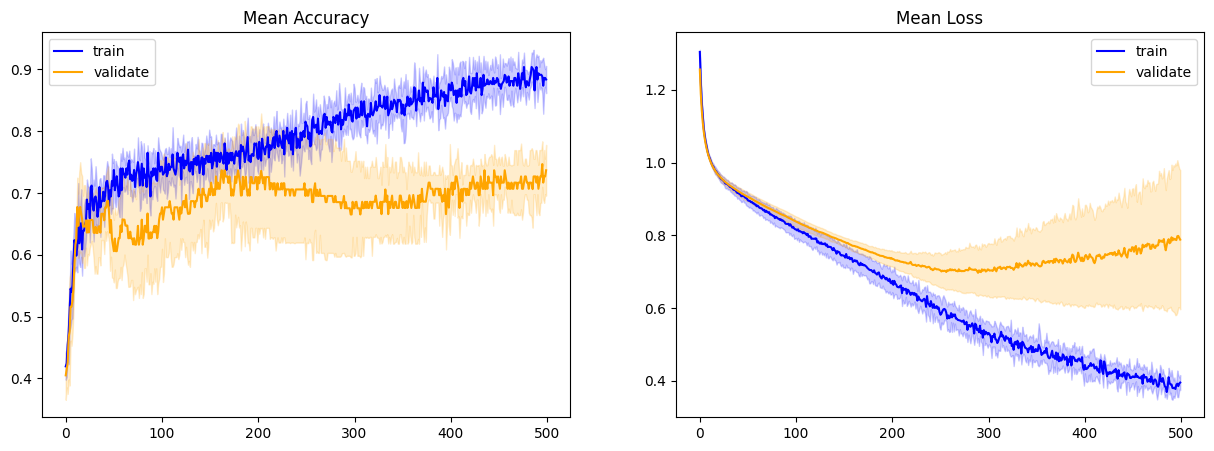

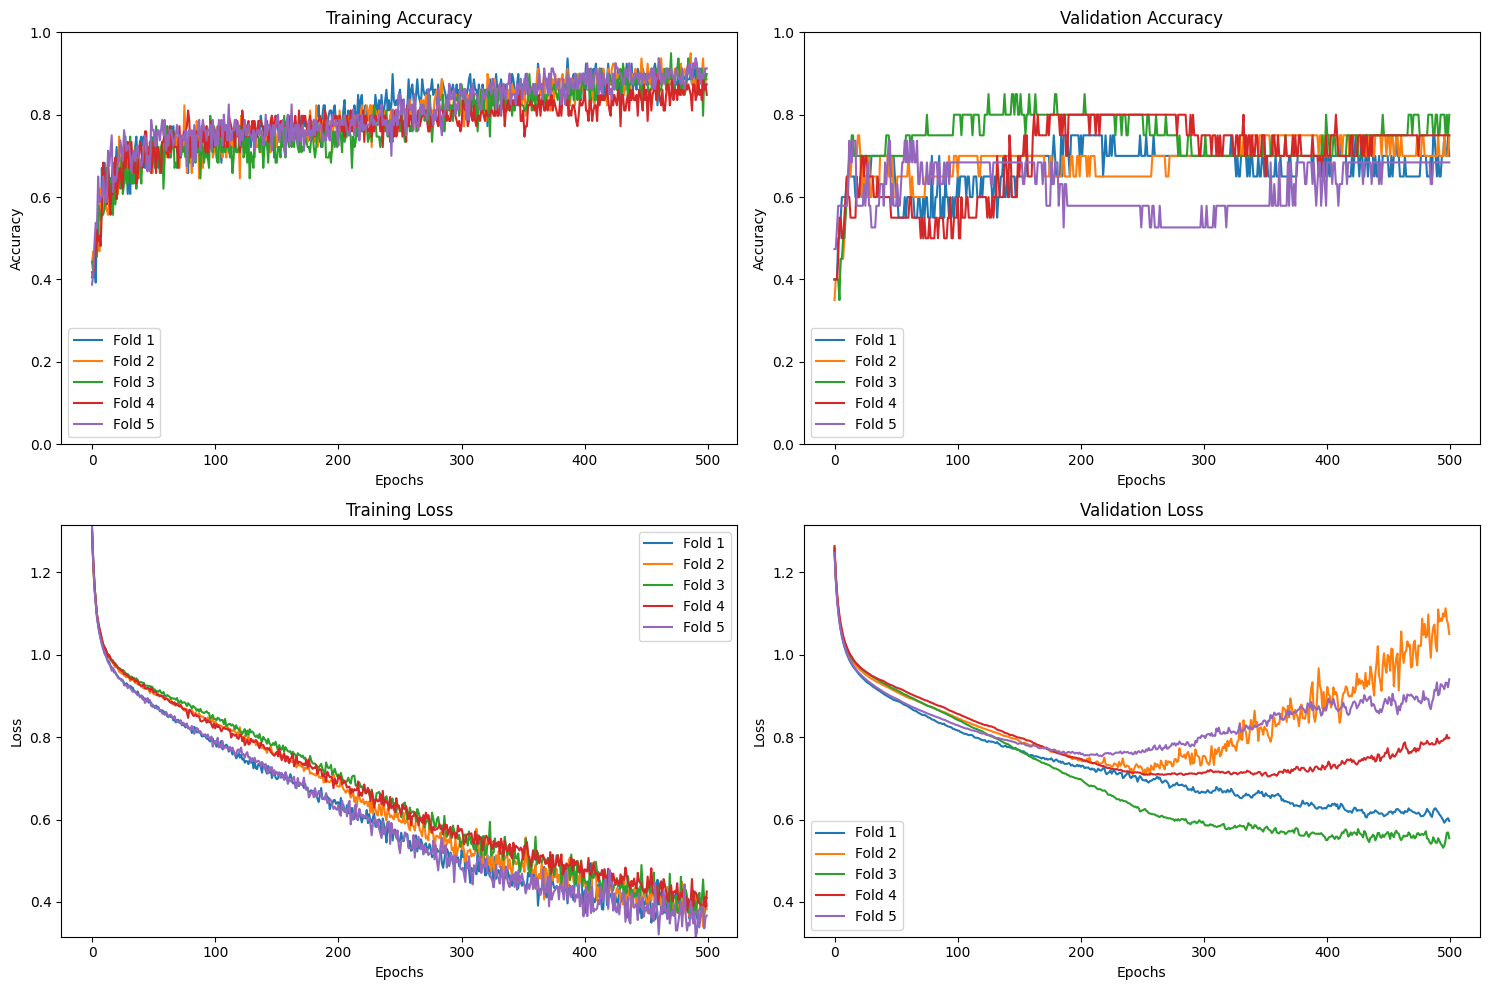

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted classes:       [0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
true validation classes: [1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0]


In [207]:
reset_weights(model3c)
crossvalidate(embeddings_df, model3c, column_names, 'pond',kf,500,True)

### Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6800 - loss: 0.7119
[0.7119148373603821, 0.6800000071525574]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted values: [0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1]
True values: [0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1]


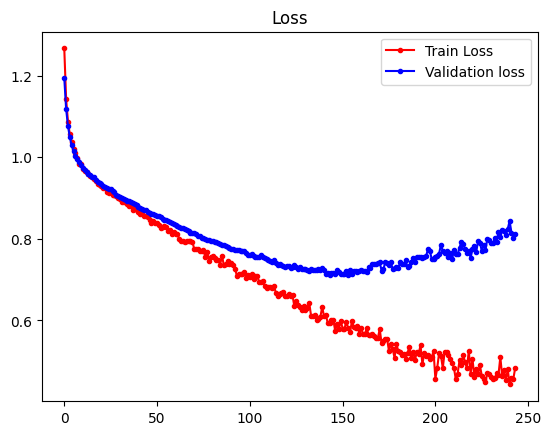

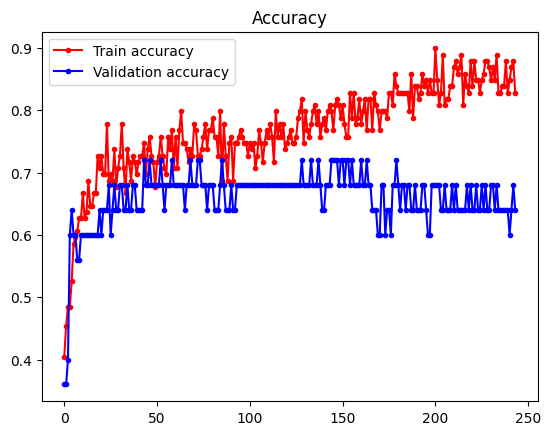

In [208]:
reset_weights(model3c)
history3c=model3c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model3c, history3c, X_test_c, y_test)